# Toy data interpolation: gaussian and 2 moons

- Source ($x_0$): std Gaussian
- Target ($x_1$): 2 moons

We use the simplified conditional flow-matching (CFM) framwork where:

$p_t(x|x_0,x_1)  = \mathcal{N}(x|tx_1+(1-t)x_0, \sigma^2)$

$u_t(x|x_0,x_1)  = x_1 - x_0$


In [23]:
import matplotlib.pyplot as plt

from DynGenModels.trainer.trainer import DynGenModelTrainer
from DynGenModels.configs.toys_configs import Gauss_2_Moons_MLP_FlowMatch as Configs

configs = Configs(data_name = 'gauss_to_2moons',
                num_points = 10000,
                data_split_fracs = [0.8, 0.0976, 0.1024],
                batch_size = 256,
                epochs = 1000,
                num_gaussians=1,
                gauss_centers=[[0.0, 0.0]],
                gauss_N_var=1.0,
                gauss_N_scale=1.0,
                lr = 1e-3,
                dim_hidden = 64, 
                sigma = 0.1,
                solver='dopri5',
                num_sampling_steps=100  
               )

#...set working directory for results:

configs.set_workdir(path='../results', save_config=True)



#===========================================================================
INFO: created directory: ../results/MLP.gauss_to_2moons_2023.09.30_13h11__1
#===========================================================================
+--------------------+-----------------------+
| Parameters         | Values                |
+--------------------+-----------------------+
| features           | ['x', 'y']            |
| data_name          | gauss_to_2moons       |
| num_points         | 10000                 |
| dim_input          | 2                     |
| moon_2_noise       | 0.2                   |
| num_gaussians      | 1                     |
| gauss_N_scale      | 1.0                   |
| gauss_N_var        | 1.0                   |
| gauss_centers      | [[0.0, 0.0]]          |
| device             | cpu                   |
| data_split_fracs   | [0.8, 0.0976, 0.1024] |
| batch_size         | 256                   |
| epochs             | 1000                  |
| lr              

In [24]:
from DynGenModels.datamodules.toys.datasets import Gauss2MoonsDataset 
from DynGenModels.datamodules.toys.dataloader import ToysDataLoader 
from DynGenModels.models.deep_nets import MLP
from DynGenModels.dynamics.cnf.flowmatch import SimplifiedCondFlowMatching

dataset = Gauss2MoonsDataset(configs)
dataloader = ToysDataLoader(dataset, configs)
net = MLP(configs)
dynamics = SimplifiedCondFlowMatching(net, configs)
cfm = DynGenModelTrainer(dynamics, dataloader, configs)
cfm.train()



INFO: building dataloaders...
INFO: train/val/test split ratios: 0.8/0.0976/0.1024
INFO: train size: 8000, validation size: 976, testing sizes: 1024
INFO: number of training parameters: 8706


epochs:   0%|          | 0/1000 [00:00<?, ?it/s]

In [25]:
from DynGenModels.pipelines.SamplingPipeline import FlowMatchPipeline 

pipeline = FlowMatchPipeline(trained_model=cfm, configs=configs)

INFO: neural ODE solver with dopri5 method and steps=100


sampling:   0%|          | 0/4 [00:00<?, ?it/s]

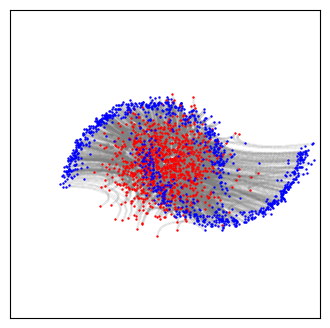

In [26]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(4,4))
for i in range(configs.num_sampling_steps): 
    plt.scatter(pipeline.trajectories[i][:,0], pipeline.trajectories[i][:,1], s=0.05, color='gray', alpha=0.2)
plt.scatter(pipeline.trajectories[0][:,0], pipeline.trajectories[0][:,1], s=0.5, color='red')
plt.scatter(pipeline.trajectories[-1][:,0], pipeline.trajectories[-1][:,1], s=0.5, color='blue')
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.xticks([])
plt.yticks([])
plt.show()

# Toy data interpolation: gaussian and 2 moons

- Source ($x_0$): std Gaussian
- Target ($x_1$): 2 moons

We use the simplified flow-matching (FM) framwork where:

$p_t(x|x_0,x_1)  = \mathcal{N}(x|tx_1, (1-t)^2)$

$u_t(x|x_0,x_1)  = x_1 - x_0$

In [12]:
import matplotlib.pyplot as plt

from DynGenModels.trainer.trainer import DynGenModelTrainer
from DynGenModels.configs.toys_configs import Gauss_2_Moons_MLP_FlowMatch as Configs

configs = Configs(data_name = 'gauss_to_2moons',
                num_points = 10000,
                data_split_fracs = [0.8, 0.2, 0.],
                batch_size = 256,
                epochs = 1000,
                num_gaussians=1,
                gauss_centers=[[0.0, 0.0]],
                gauss_N_var=1.0,
                gauss_N_scale=1.0,
                lr = 1e-3,
                dim_hidden = 64, 
                print_epochs=10,
                early_stopping=15,
                sigma = 1e-5,
                solver='dopri5',
                num_sampling_steps=100  
               )

#...set working directory for results:

configs.set_workdir(path='../results', save_config=True)

from DynGenModels.datamodules.toys.datasets import Gauss2MoonsDataset 
from DynGenModels.datamodules.toys.dataloader import ToysDataLoader 
from DynGenModels.models.deep_nets import MLP
from DynGenModels.dynamics.cnf.flowmatch import FlowMatching

dataset = Gauss2MoonsDataset(configs)
dataloader = ToysDataLoader(dataset, configs)
net = MLP(configs)
dynamics = FlowMatching(net, configs)
fm = DynGenModelTrainer(dynamics, dataloader, configs)
fm.train()

#===========================================================================
INFO: created directory: ../results/MLP.gauss_to_2moons_2023.09.30_00h47__1
#===========================================================================
+--------------------+-----------------+
| Parameters         | Values          |
+--------------------+-----------------+
| features           | ['x', 'y']      |
| data_name          | gauss_to_2moons |
| num_points         | 10000           |
| dim_input          | 2               |
| moon_2_noise       | 0.2             |
| num_gaussians      | 1               |
| gauss_N_scale      | 1.0             |
| gauss_N_var        | 1.0             |
| gauss_centers      | [[0.0, 0.0]]    |
| device             | cpu             |
| data_split_fracs   | [0.8, 0.2, 0.0] |
| batch_size         | 256             |
| epochs             | 1000            |
| lr                 | 0.001           |
| early_stopping     | 15              |
| warmup_epochs      |          

epochs:   0%|          | 0/1000 [00:00<?, ?it/s]

	 test loss: 20.868377685546875  (min loss: 20.868377685546875)
	 test loss: 20.85732674598694  (min loss: 19.80523705482483)
	 test loss: 20.717093229293823  (min loss: 19.33508825302124)
	 test loss: 19.287717580795288  (min loss: 19.041927814483643)
	 test loss: 20.13406729698181  (min loss: 18.86551260948181)
	 test loss: 18.639637112617493  (min loss: 17.971627235412598)
	 test loss: 19.76103675365448  (min loss: 17.971627235412598)
INFO: early stopping triggered! Reached maximum patience at 63 epochs


INFO: neural ODE solver with dopri5 method and steps=100


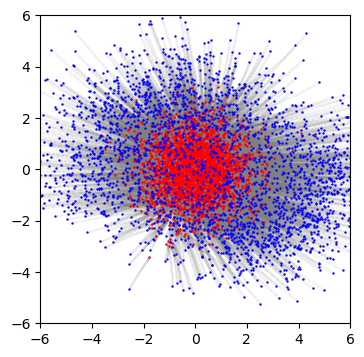

In [13]:
import torch
import matplotlib.pyplot as plt
from DynGenModels.pipelines.SamplingPipeline import FlowMatchPipeline 

pipeline = FlowMatchPipeline(trained_model=fm, configs=configs, source_input=torch.randn(3000,2))

#...plots

fig, ax = plt.subplots(1,1, figsize=(4,4))
for i in range(configs.num_sampling_steps): 
    plt.scatter(pipeline.trajectories[i][:,0], pipeline.trajectories[i][:,1], s=0.05, color='gray', alpha=0.2)
plt.scatter(pipeline.trajectories[0][:,0], pipeline.trajectories[0][:,1], s=0.5, color='red')
plt.scatter(pipeline.trajectories[-1][:,0], pipeline.trajectories[-1][:,1], s=0.5, color='blue')
plt.xlim(-6,6)
plt.ylim(-6,6)
# plt.xticks([])
# plt.yticks([])
plt.show()

# Toy data interpolation: 8 gaussians to 2 moons

In [18]:
import matplotlib.pyplot as plt

from DynGenModels.trainer.trainer import DynGenModelTrainer
from DynGenModels.configs.toys_configs import Gauss_2_Moons_MLP_FlowMatch as Configs

configs = Configs(data_name = '8gauss_to_2moons',
                num_points = 10000,
                data_split_fracs = [0.8976, 0.0, 0.1024],
                batch_size = 256,
                epochs = 1000,
                lr = 1e-3,
                dim_hidden = 64, 
                sigma = 0.1,
                solver='dopri5',
                num_sampling_steps=100  
               )

#...set working directory for results:

configs.set_workdir(path='../results', save_config=True)


#============================================================================
INFO: created directory: ../results/MLP.8gauss_to_2moons_2023.09.30_00h49__2
#============================================================================
+--------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Parameters         | Values                                                                                                                                                                                                                         |
+--------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| features           | 

In [19]:
from DynGenModels.datamodules.toys.datasets import Gauss2MoonsDataset 
from DynGenModels.datamodules.toys.dataloader import ToysDataLoader 
from DynGenModels.models.deep_nets import MLP
from DynGenModels.dynamics.cnf.flowmatch import SimplifiedCondFlowMatching

dataset = Gauss2MoonsDataset(configs)
dataloader = ToysDataLoader(dataset, configs)
net = MLP(configs)
dynamics = SimplifiedCondFlowMatching(net, configs)
cfm = DynGenModelTrainer(dynamics, dataloader, configs)
cfm.train()

INFO: building dataloaders...
INFO: train/val/test split ratios: 0.8976/0.0/0.1024
INFO: train size: 8976, validation size: 0, testing sizes: 1024
INFO: number of training parameters: 8706


epochs:   0%|          | 0/1000 [00:00<?, ?it/s]

In [38]:
from DynGenModels.pipelines.SamplingPipeline import FlowMatchPipeline 

pipeline = FlowMatchPipeline(trained_model=cfm, configs=configs)

INFO: neural ODE solver with dopri5 method and steps=100


sampling:   0%|          | 0/4 [00:00<?, ?it/s]

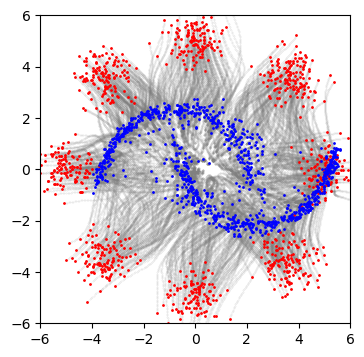

In [39]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(4,4))
for i in range(configs.num_sampling_steps): 
    plt.scatter(pipeline.trajectories[i][:,0], pipeline.trajectories[i][:,1], s=0.1, color='gray', alpha=0.2)
plt.scatter(pipeline.trajectories[0][:,0], pipeline.trajectories[0][:,1], s=1, color='red')
plt.scatter(pipeline.trajectories[-1][:,0], pipeline.trajectories[-1][:,1], s=1, color='blue')
plt.xlim(-6,6)
plt.ylim(-6,6)
# plt.xticks([])
# plt.yticks([])
plt.show()